<a href="https://colab.research.google.com/github/Amankr351/Netflix-Movies-and-TV-Shows-Clustering-Project./blob/main/Netflix_Movies_And_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Netflix Movies and TV Shows Clustering.

##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member 1**-  $\color{green}{\text{Aman kumar.}}$

##Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do

1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features.

##Know Your Data

###Import Libraries

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')


###Dataset Loading

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv', encoding = 'ISO-8859-1')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
original_df = data.copy()

##Data preparation and cleaning

In [ ]:
data.shape   #The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.

(7787, 12)

In [ ]:
data.info()   #The info() method prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
data.isnull().sum()  #To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#total null values
data.isnull().sum().sum()

3631

There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column,10 in date_added and 7 in rating. so we need to handle the null values.

In [ ]:
#Handling Null Values
data['cast'].fillna(value='No cast',inplace=True)
data['country'].fillna(value=data['country'].mode()[0],inplace=True)

In [ ]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
data.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
#Dropping Director Column
data.drop(['director'],axis=1,inplace=True)

In [ ]:
#Checking for duplicate values.
data.duplicated().sum()   

0

As we can see there are no duplicate values, so we can move ahead.

In [ ]:
#again checking is there any null values are not
data.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
#List of columns of the dataframe.
data.columns    

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

##Exploratory Data Analysis

In [ ]:
#darkgrid style
sns.set_style('darkgrid')  

###percentage of Movies and TV Shows in the dataset.

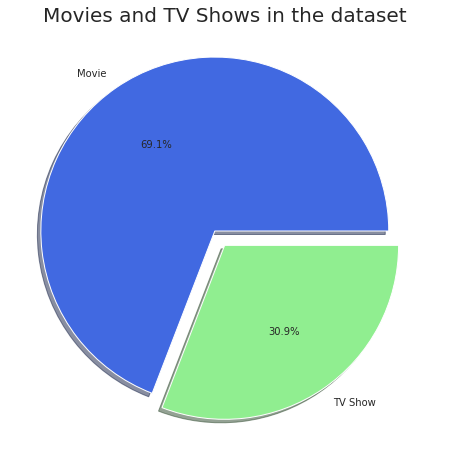

In [ ]:
#Creating a visualisation for the type dataframe
plt.figure(figsize=(10,8))
labels = data['type'].value_counts(sort = True).index                 
sizes = data['type'].value_counts(sort = True)
colors = ["royalblue","lightgreen"]
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Movies and TV Shows in the dataset',size = 20)
plt.show()

###Distribution by released year

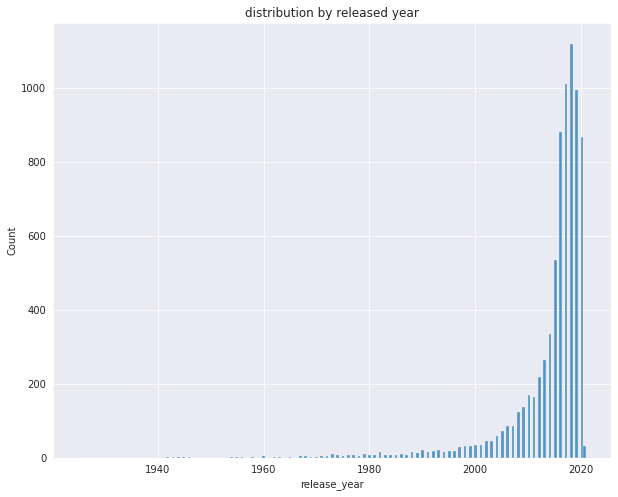

In [ ]:
#Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,8))
sns.histplot(data['release_year'])
plt.title('distribution by released year');

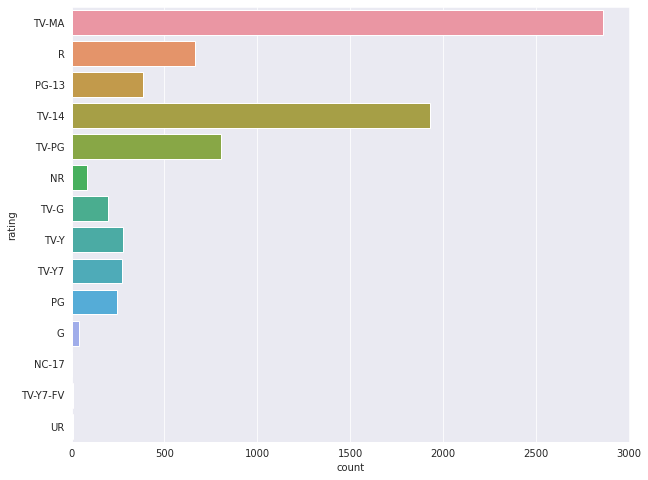

In [ ]:
#Age ratings for shows in the dataset
plt.figure(figsize=(10,8))
sns.countplot(y='rating',data=data);

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages'] = data['rating'].replace(ratings)


In [ ]:
data['target_ages'] = pd.Categorical(data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
data.head(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens


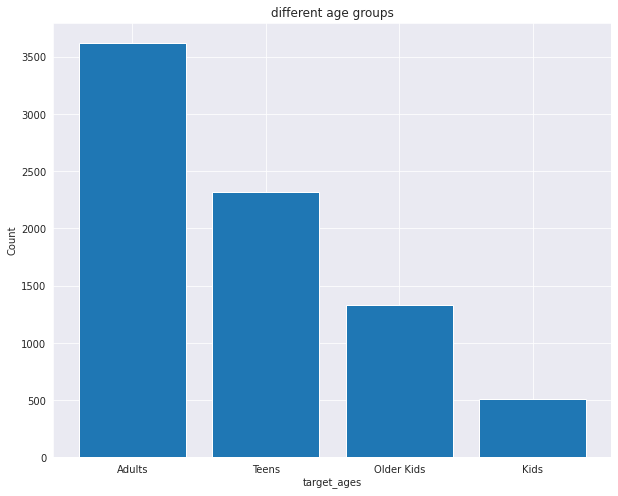

In [ ]:
x = data['target_ages'].value_counts().index
y =  data['target_ages'].value_counts()

plt.figure(figsize=(10,8))
plt.title('different age groups')
plt.bar(x, y, width =0.8)         
plt.ylabel('Count')
plt.xlabel('target_ages')                 
plt.title('different age groups');

In [ ]:
# Choosing the primary country and primary genre to simplify the analysis
data['country'] = data['country'].apply(lambda x: x.split(',')[0])
data['listed_in'] = data['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
#Country DataFrame
data.country.value_counts()

United States     3379
India              956
United Kingdom     576
Canada             259
Japan              235
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 81, dtype: int64

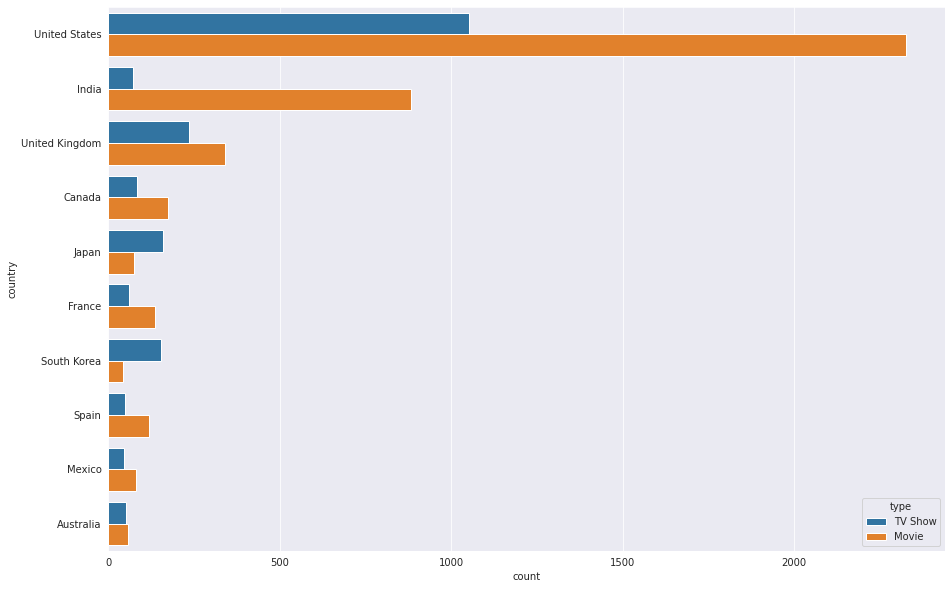

In [ ]:

plt.figure(figsize=(15,10))
sns.countplot(y=data['country'],data=data,order=data['country'].value_counts().index[0:10], hue = data['type']);

In [ ]:
# genre of shows and movies
data.listed_in.value_counts()

Dramas                          1383
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         356
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     146
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            52
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [ ]:
movies = data[data['type'] == 'Movie']
shows = data[data['type'] == 'TV Show']



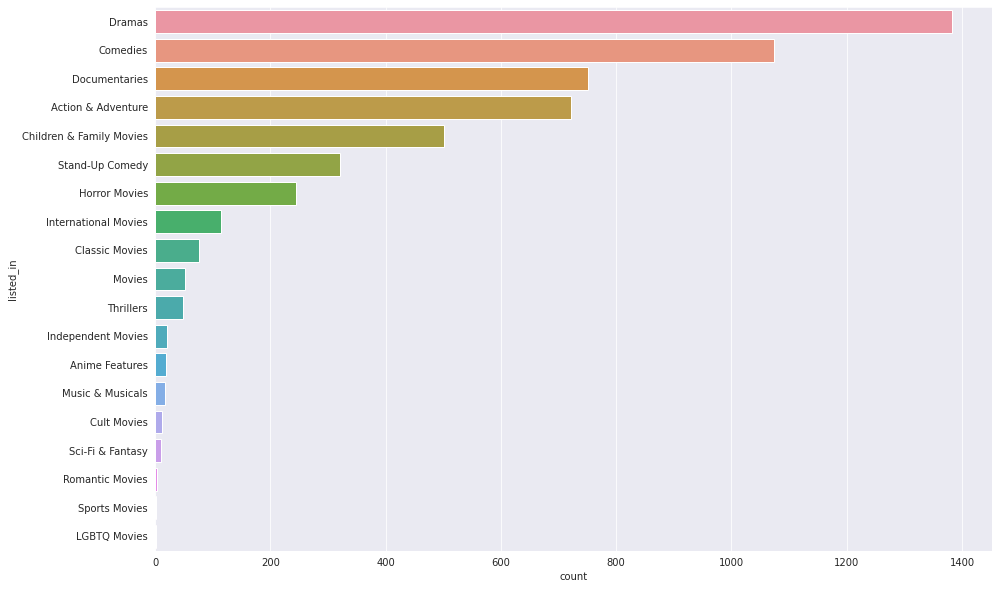

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:20]);

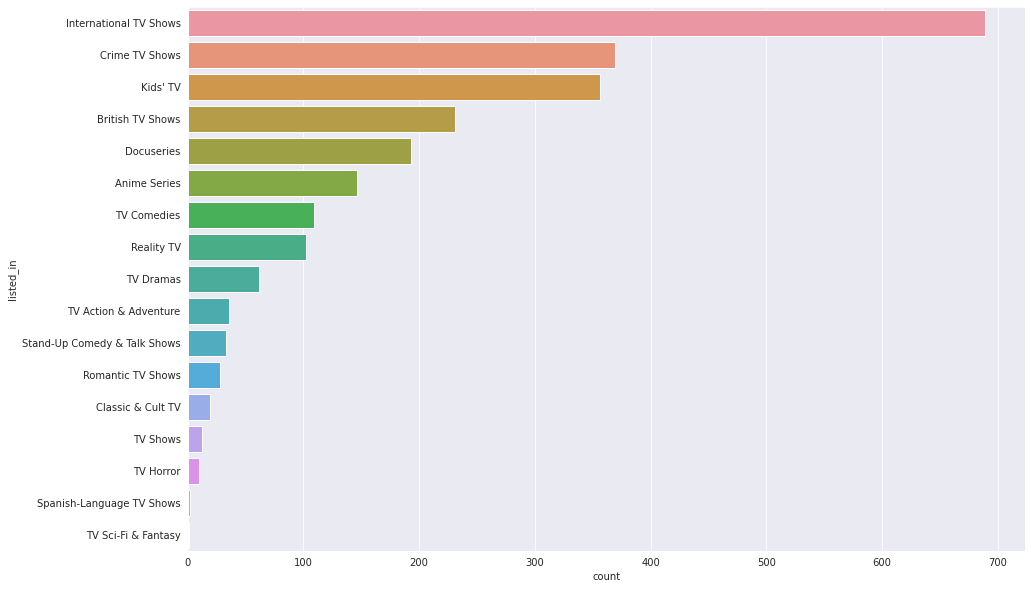

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y=shows['listed_in'],data=shows,order=shows['listed_in'].value_counts().index[0:20]);

In [ ]:
data.duration.value_counts()

1 Season     1606
2 Seasons     378
3 Seasons     183
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
37 min          1
233 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

In [ ]:
# Splitting the duration column, and changing the datatype to integer
movies['duration'] = movies['duration'].apply(lambda x: int(x.split()[0]))
shows['duration'] = shows['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
movies.duration.value_counts()

90     136
93     131
94     125
91     125
95     119
      ... 
182      1
224      1
37       1
233      1
191      1
Name: duration, Length: 201, dtype: int64

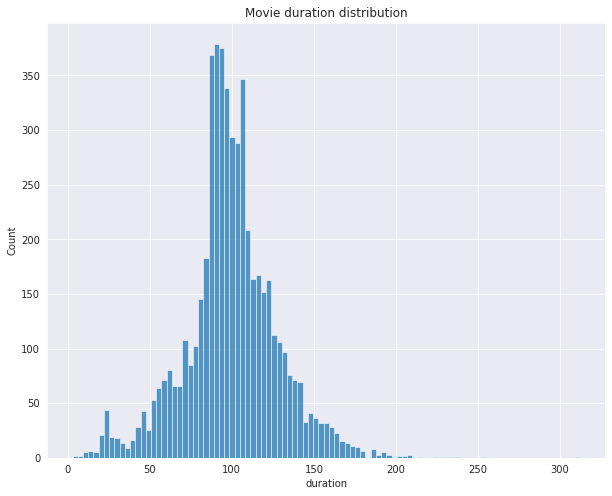

In [ ]:
# length of movie analysis
plt.figure(figsize=(10,8))
sns.histplot(x='duration',data=movies)
plt.title('Movie duration distribution');

In [ ]:
shows.duration.value_counts()

1     1606
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

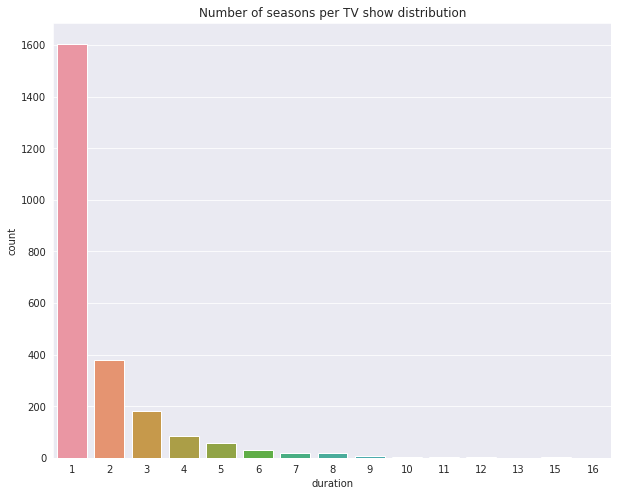

In [ ]:
# Seasons in each TV show
plt.figure(figsize=(10,8))
sns.countplot(x='duration',data=shows)
plt.title('Number of seasons per TV show distribution');

In [ ]:
# Typecasting 'date_added' from string to datetime
data["date_added"] = pd.to_datetime(data['date_added'])

In [ ]:
# Adding new attributes month and year of date added

data['month_added'] = data['date_added'].dt.month
data['year_added'] = data['date_added'].dt.year
data.drop('date_added', axis=1, inplace=True)

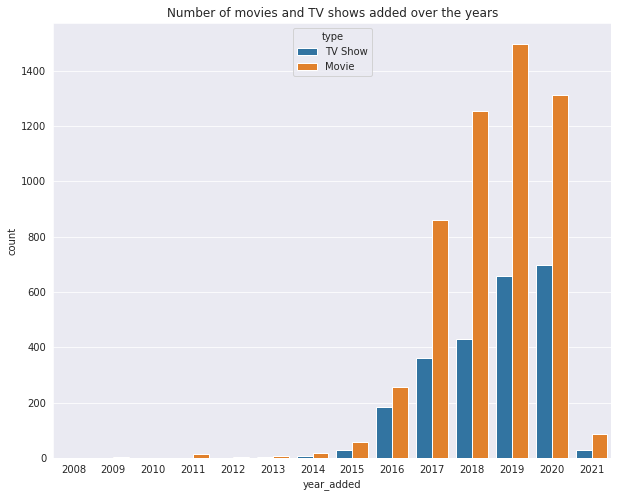

In [ ]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,8))
sns.countplot(x='year_added',data=data, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('year_added');

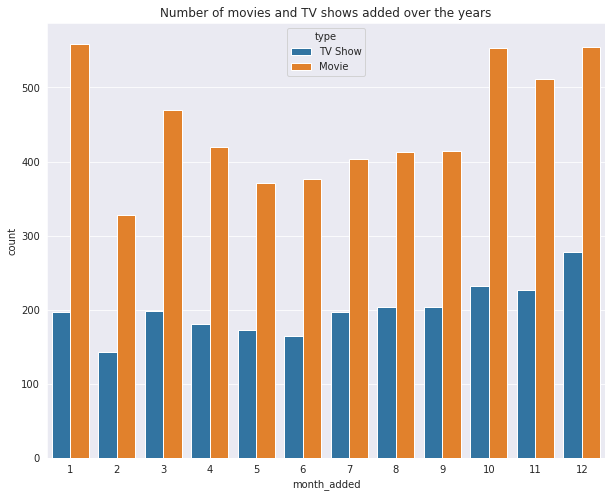

In [ ]:
# Number of movies and TV shows added over the months
plt.figure(figsize=(10,8))
sns.countplot(x='month_added',data=data, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('month_added');

In [ ]:
data[data.year_added == data.release_year]['type'].value_counts()

Movie      1612
TV Show    1211
Name: type, dtype: int64

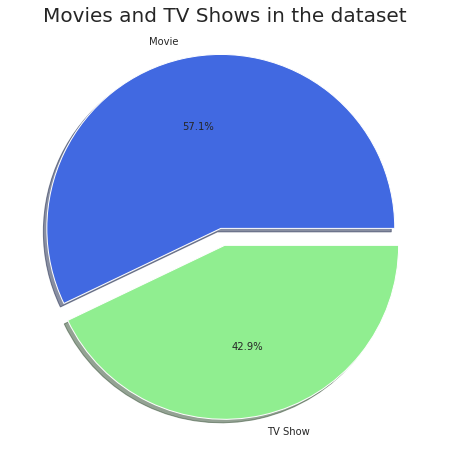

In [ ]:
content = data[data['year_added'] == data['release_year']]
plt.figure(figsize=(10,8))
labels = content['type'].value_counts(sort = True).index                 
sizes = content['type'].value_counts(sort = True)
colors = ["royalblue","lightgreen"]
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Movies and TV Shows in the dataset',size = 20)
plt.show()

##Data preprocessing

In [ ]:
data['description'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7787, dtype: object

In [ ]:
# after above all the changes, those features are in list format, so making list of description feature
data['description'] = data['description'].apply(lambda x: x.split(' '))

In [ ]:
# converting text feature to string from list
data['description']= data['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
data['description']= data['description'].apply(lambda x: x.lower())

In [ ]:
# extracting the stopwords from nltk library
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
data['description']= data['description'].apply(remove_punctuation)

In [ ]:
data['description'][0:10]

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
5    a genetics professor experiments with a treatm...
6    after an awful accident a couple admitted to a...
7    after one of his high school students attacks ...
8    when a doctor goes missing his psychiatrist wi...
9    an architect and his wife move into a castle t...
Name: description, dtype: object

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
data['description']=data['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
data['description'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [ ]:
# creating a function of stemming function using SnowballStemmer module

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 
     

In [ ]:
# applying above created STEMMING function to the DESCRIPTION attribute.

data['description'] = data['description'].apply(stemming)

In [ ]:
# add description length column 

data['description_length']=data['description'].apply(lambda x : len(x))


In [ ]:
# create function to convert list into string

def listToString(s):
    str1 = ""
    for ele in s:
        str1 += ele
    return str1

In [ ]:
# convert list to string

data['listed_in']=data['listed_in'].apply(listToString)

In [ ]:
# create a column for length of genre

data['genre_length']=data['listed_in'].apply(lambda x : len(x))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
X_features_rec_mon=data[['description_length','genre_length']]
scaler_rec_mon=StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

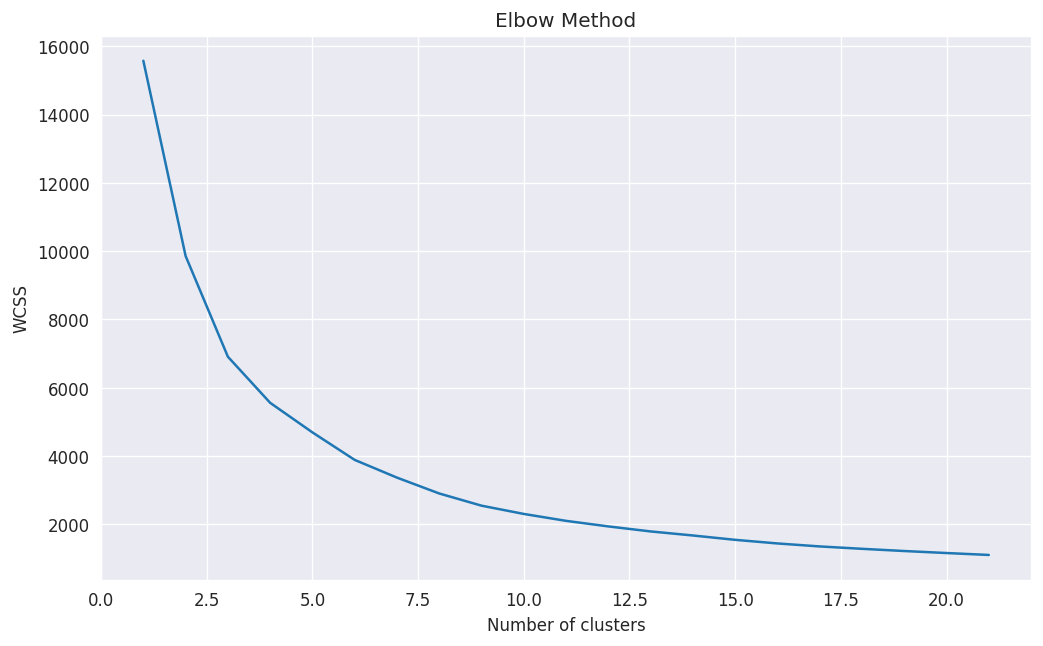

In [ ]:

# Interpretation of a line plot with an elbow shape

plt.figure(figsize=(10,6), dpi=120)

# within clusters sum of squares
wcss=[]
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# predict and check the silhouette score

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3558939959236733
For n_clusters = 3, silhouette score is 0.356990275795522
For n_clusters = 4, silhouette score is 0.32906079096033936
For n_clusters = 5, silhouette score is 0.3355915126712457
For n_clusters = 6, silhouette score is 0.35410639675028793
For n_clusters = 7, silhouette score is 0.35152164652719453
For n_clusters = 8, silhouette score is 0.351643147720696
For n_clusters = 9, silhouette score is 0.3500512239945633
For n_clusters = 10, silhouette score is 0.34781120591665793
For n_clusters = 11, silhouette score is 0.3416914139610727
For n_clusters = 12, silhouette score is 0.3446413787807677
For n_clusters = 13, silhouette score is 0.3428332945851372
For n_clusters = 14, silhouette score is 0.3426998308402121
For n_clusters = 15, silhouette score is 0.3515573593767655
For n_clusters = 16, silhouette score is 0.3588750993573591
For n_clusters = 17, silhouette score is 0.35826884728474434
For n_clusters = 18, silhouette score is 0.35

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

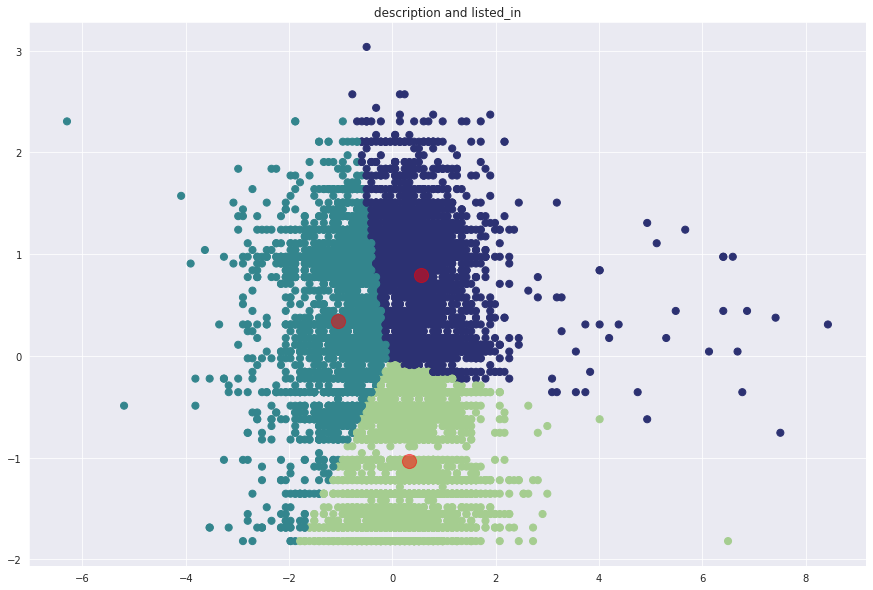

In [ ]:
# plotting a scatterplot

plt.figure(figsize=(15,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap= 'crest')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

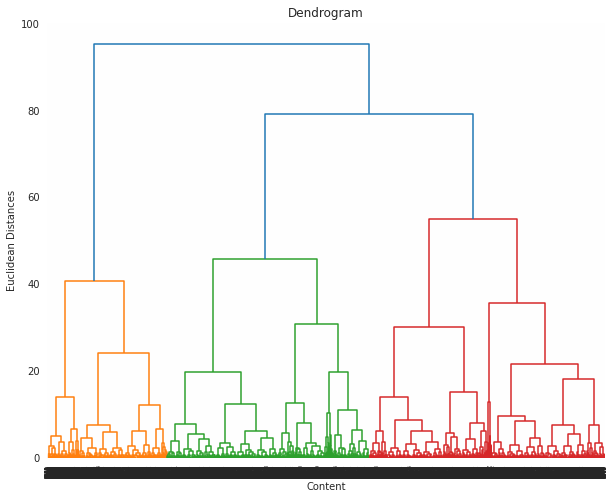

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
# applying agglomerative clustring

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

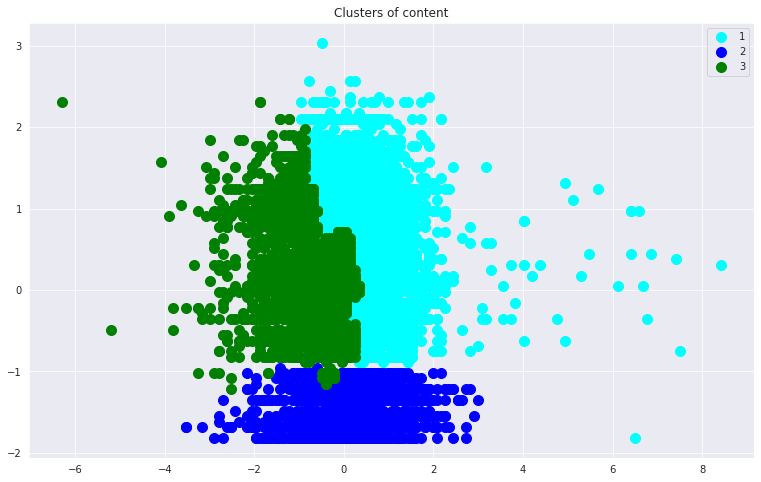

In [ ]:
# graphical representaion

plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'cyan', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.title('Clusters of content')

plt.legend()
plt.show()

In [ ]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

Silhouette Coefficient: 0.297
